# Varmepumpeberegninger
Vi ser på en modell for beregning av kostnader til oppvarming med og uten varmepumpe.

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Oppvarmingsbehov. Anta et grunnleggende oppvarmingsbehov på 20 kWh/dag
def konstant_energibehov(t):
    """Returns a constant energy requirement.

    Parameters:
        t (array-like): The time parameter (not used in the calculation).

    Returns:
        int: A constant value of 20.
    """
    return 20

def temperaturavhengig_energibehov(t):
    # Legg til en tilfeldig støy på 2 kWh/dag. Dessuten, jo kaldere det er, jo mer
    # energi trengs. Siden temperaturen fluktuerer rundt 10 grader, legger vi inn et
    # konstant ledd på 10 kWh/dag i temperatur-leddet. Dermed får vi samme årsmiddel som
    # i konstant_energibehov.
    return 20 + 2 * np.random.randn(np.size(t)) - 0.5 * (temperatur(t) - 10)
# Temperatur i grader Celsius. Anta en grunnleggende temperatur på 10 grader, med en årlig variasjon på 10 grader.
def temperatur(t):
    # Tid på året i år. Middeltemperatur på 10 grader. Kaldest ved t=0.1, dvs. slutten av januar.
    middeltemperatur = 10
    årsfluktuasjon = - 10 * np.cos(2 * np.pi * t - 0.1)
    daglig_fluktuasjon = 2 * np.random.randn(np.size(t))
    return middeltemperatur + årsfluktuasjon + daglig_fluktuasjon


def kostnad_uten_varmepumpe(oppvarmingsbehov, strømpris):
    return np.cumsum(oppvarmingsbehov * strømpris)

def kostnad_med_varmepumpe(oppvarmingsbehov, strømpris, cop):
    return np.cumsum(oppvarmingsbehov * strømpris / cop)

def temperaturavhengig_cop(temperatur):
    """Beregn COP (Coefficient of Performance) for en varmepumpe basert på temperatur.

    Parametere:
        temperatur (array-like): Temperaturen i grader Celsius.

    Returverdi:
        array-like: COP for en varmepumpe basert på temperatur.
    """
    return 3 - 0.1 * np.maximum(0, 10 - temperatur)

def konstant_cop(temperatur):
    return 3

def temperaturavhengig_strømpris(t, temperatur):
    """Beregn strømprisen basert på tid og temperatur.

    Parametere:
        t (array-like): Tidspunktet (ikke brukt i beregningen, men inkludert for
            fremtidig bruk).
        temperatur (array-like): Temperaturen i grader Celsius.

    Returverdi:
        array-like: Strømprisen i NOK/kWh. Basert på en grunnpris på 0,1 NOK/kWh, med en
        økning på 0,1 NOK/kWh for hver grad temperaturen er under 10 grader Celsius.
    """
    return 0.3 + 0.3 * np.maximum(0, 10 - temperatur)

def konstant_strømpris(t, temperatur):
    """Beregn strømprisen basert på tid og temperatur.

    Parametere:
        t (array-like): Tidspunktet (ikke br
        """
    return 0.3


Definer plottefunksjoner

In [5]:

def plott_total_sparing(t, spart, gå_i_null_dag):
    plt.figure()
    plt.plot(t, spart)
    plt.axvline(gå_i_null_dag / 365, color='r', linestyle='--')
    # Legg til markører for dagen hvor man går i null
    plt.plot(gå_i_null_dag / 365, 0, 'ro')
    hele_år = gå_i_null_dag // 365
    resterende_dager = gå_i_null_dag % 365
    plt.text(gå_i_null_dag / 365, 0, f'Går i null etter {hele_år} år og {resterende_dager} dager', verticalalignment='bottom')
    plt.xlabel('Tid [år]')
    plt.ylabel('Total sparing [NOK]')
    plt.title('Total sparing over tid')

def plott_kostnader(t, kostnad_uten, kostnad_med, gå_i_null_dag=None):
    plt.figure()
    plt.plot(t, kostnad_uten, label='Kostnad uten varmepumpe')
    plt.plot(t, kostnad_med, label='Kostnad med varmepumpe')
    if gå_i_null_dag is not None:
        plt.axvline(gå_i_null_dag / 365, color='r', linestyle='--')
        # Legg til markører
        hele_år = gå_i_null_dag // 365
        resterende_dager = gå_i_null_dag % 365
        plt.text(gå_i_null_dag / 365, 0, f'Går i null etter {hele_år} år og {resterende_dager} dager', verticalalignment='bottom')
    plt.xlabel('Tid [år]')
    plt.ylabel('Total kostnad [NOK]')
    plt.title('Total kostnad over tid')
    plt.legend()

def plott_temperatur_og_oppvarmingsbehov(t, temperatur, behov):
    plt.figure()
    plt.plot(t, temperatur, label='Temperatur')
    plt.plot(t, behov, label='Oppvarmingsbehov')
    plt.xlabel('Tid [år]')
    plt.ylabel('Temperatur [C] / Oppvarmingsbehov [kWh]')
    plt.title('Temperatur og oppvarmingsbehov over tid')
    plt.legend()

Går i null etter 1169 dager


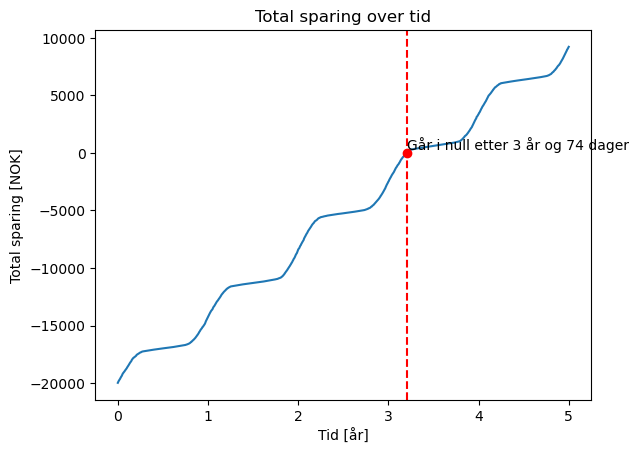

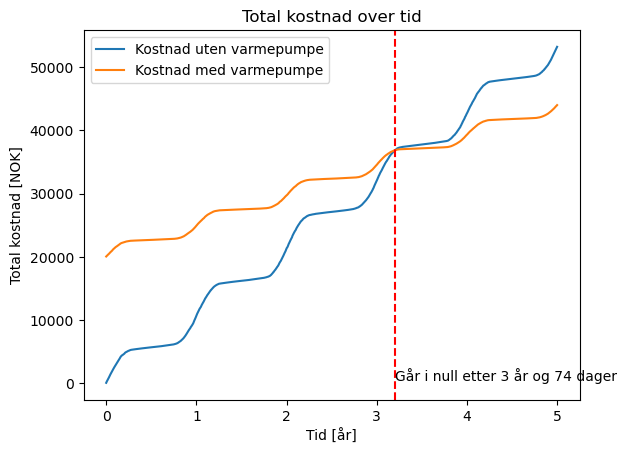

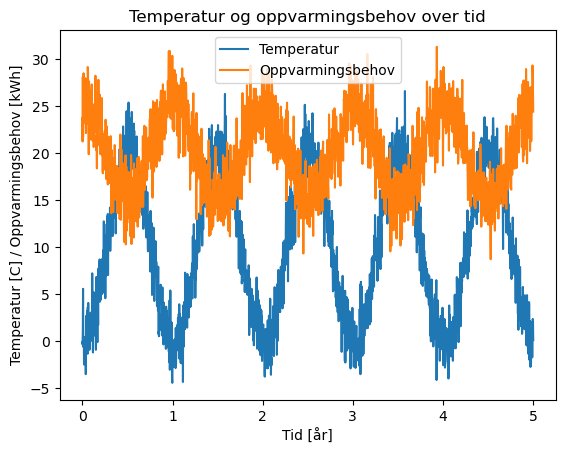

In [7]:
# Generer daglige oppvarmingsdata
np.random.seed(1)
num_years = 5
# Tid i år. Anta et år med 365 dager
t = np.linspace(0, num_years, 365 * num_years)

# Velg metode for strømpris, COP og energibehov
konstant_modell = False
if konstant_modell:
    strømpris = konstant_strømpris
    cop = konstant_cop
    energibehov = konstant_energibehov
else:
    strømpris = temperaturavhengig_strømpris
    cop = temperaturavhengig_cop
    energibehov = temperaturavhengig_energibehov

# Beregn kostnader og besparelser
investeringskostnad = 20000
pris = strømpris(t, temperatur(t))
kostnad_uten = kostnad_uten_varmepumpe(energibehov(t), pris)
kostnad_med = kostnad_med_varmepumpe(energibehov(t), pris, cop(temperatur(t)))
spart = -investeringskostnad - kostnad_med + kostnad_uten
gå_i_null_dag = np.argmax(spart > 0)

print(f'Går i null etter {gå_i_null_dag} dager')
plott_total_sparing(t, spart, gå_i_null_dag)
plott_kostnader(t, kostnad_uten, investeringskostnad + kostnad_med, gå_i_null_dag)
plott_temperatur_og_oppvarmingsbehov(t, temperatur(t), energibehov(t))
